In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
loans = pd.read_csv('C:/Users/hp/Desktop/elevvo pathway Internship/Tasks/Loan-Approval-Prediction/Data/loan_approval_dataset.csv')
print("Data Loaded Successfully !")

Data Loaded Successfully !


In [3]:
loans.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
loans.shape

(4269, 13)

In [6]:
loans.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
loans.duplicated().sum()

np.int64(0)

In [8]:
loans.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

C:\Users\hp\AppData\Local\Temp\ipykernel_5452\3222838311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ' loan_status',data=loans , palette='pastel')


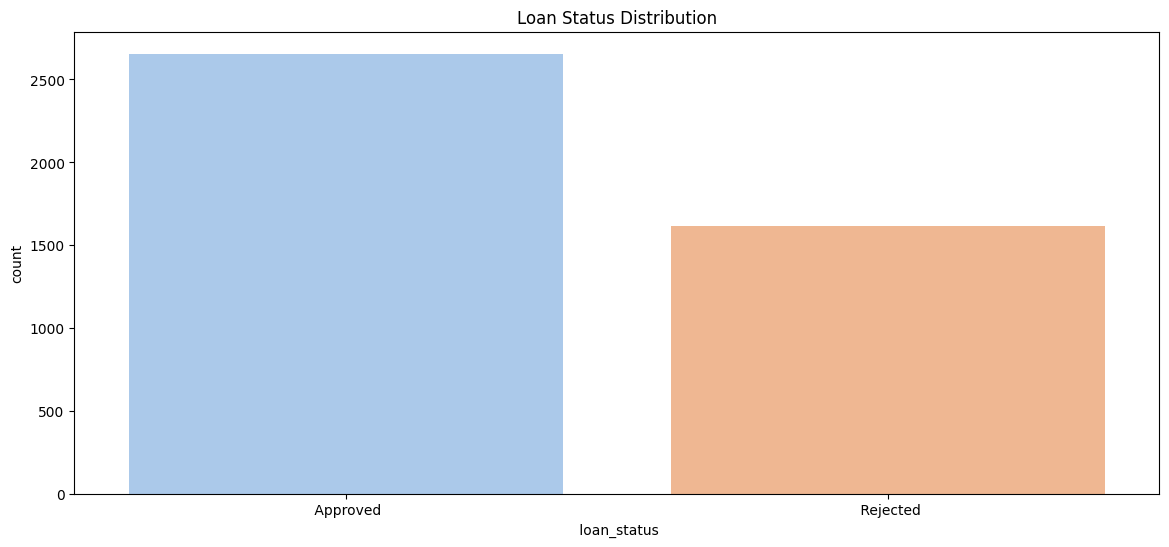

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(x = ' loan_status',data=loans , palette='pastel')
plt.title("Loan Status Distribution")
plt.show()

In [10]:
scale = StandardScaler()
num_cols = loans.select_dtypes(include=['int64','float64'])
loans[num_cols.columns] = scale.fit_transform(num_cols)
loans.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0 -1.731645          -0.294102       Graduate             No       1.617979   
1 -1.730834          -1.473548   Not Graduate            Yes      -0.341750   
2 -1.730022           0.295621       Graduate             No       1.439822   
3 -1.729211           0.295621       Graduate             No       1.119139   
4 -1.728399           1.475067   Not Graduate            Yes       1.689242   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      1.633052    0.192617      1.032792                  -0.780058   
1     -0.324414   -0.508091     -1.061051                  -0.733924   
2      1.610933    1.594031     -0.544840                  -0.057300   
3      1.721525   -0.508091     -0.771045                   1.649637   
4      1.002681    1.594031     -1.264055                   0.757724   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  2.877289              0.832028           0.930304   
1                 -0.631921             -0.694993          -0.515936   
2                 -0.107818              1.996520           2.407316   
3                 -0.381263              0.897943           0.899533   
4                  0.735304              1.568075           0.007172   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [11]:
le = LabelEncoder()
cat_cols = loans.select_dtypes(include=['object']).columns
for i in cat_cols:
    loans[i] = le.fit_transform(loans[i])

loans.head()

loan_id   no_of_dependents   education   self_employed   income_annum  \
0 -1.731645          -0.294102           0               0       1.617979   
1 -1.730834          -1.473548           1               1      -0.341750   
2 -1.730022           0.295621           0               0       1.439822   
3 -1.729211           0.295621           0               0       1.119139   
4 -1.728399           1.475067           1               1       1.689242   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      1.633052    0.192617      1.032792                  -0.780058   
1     -0.324414   -0.508091     -1.061051                  -0.733924   
2      1.610933    1.594031     -0.544840                  -0.057300   
3      1.721525   -0.508091     -0.771045                   1.649637   
4      1.002681    1.594031     -1.264055                   0.757724   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  2.877289              0.832028           0.930304   
1                 -0.631921             -0.694993          -0.515936   
2                 -0.107818              1.996520           2.407316   
3                 -0.381263              0.897943           0.899533   
4                  0.735304              1.568075           0.007172   

    loan_status  
0             0  
1             1  
2             1  
3             1  
4             1

In [12]:
X = loans.drop(columns=[' loan_status'])
y = loans[' loan_status']
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

print("Original shape:", X.shape)
print("Reduced shape:", X_selected.shape)
print("Selected feature indices:", selector.get_support(indices=True))
print("Selected features:", X.columns[selector.get_support()])

Original shape: (4269, 12)
Reduced shape: (4269, 5)
Selected feature indices: [0 1 5 6 7]
Selected features: Index(['loan_id', ' no_of_dependents', ' loan_amount', ' loan_term',
       ' cibil_score'],
      dtype='object')


In [13]:
df = loans[['loan_id',' no_of_dependents',' loan_amount',' loan_term',' cibil_score',' loan_status']]
df.head()

loan_id   no_of_dependents   loan_amount   loan_term   cibil_score  \
0 -1.731645          -0.294102      1.633052    0.192617      1.032792   
1 -1.730834          -1.473548     -0.324414   -0.508091     -1.061051   
2 -1.730022           0.295621      1.610933    1.594031     -0.544840   
3 -1.729211           0.295621      1.721525   -0.508091     -0.771045   
4 -1.728399           1.475067      1.002681    1.594031     -1.264055   

    loan_status  
0             0  
1             1  
2             1  
3             1  
4             1

In [14]:
path = 'C:/Users/hp/Desktop/elevvo pathway Internship/Tasks/Loan-Approval-Prediction/Data/loan_approval_dataset_#.csv'

df.to_csv(path,index=False)
print("Data Saved Successfully !")

Data Saved Successfully !
